In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go
from IPython.display import display, clear_output
from datetime import datetime, timedelta
import chocopearl as ch
import os
import re
import unicodedata
import hashlib

def valid_filename(text):
    text = text.replace(" ", "_")
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('ascii')
    text = re.sub(r'[^a-zA-Z0-9_.-]', '', text)
    if not text:
        text = hashlib.sha256(text_original.encode('utf-8')).hexdigest()[:8]
    return text+'.png' 


# DATA

### load multiple pickles

In [2]:
directory = '/home/pc-igp-173/Documentos/DATA/cosmic_rays/jun2024'
file_paths=ch.list_files(directory)[1]

In [3]:
crs = []
i=1
for file_path in file_paths:
    with open(file_path, 'rb') as f:
        print(f'processing {os.path.basename(file_path)}')
        not_end=True
        while not_end:
            try:
                obj = pickle.load(f)
                crs.append(obj)
                #clear_output(wait=True)
                #print(f"CosmicRay: {i}")
                i+=1
            except EOFError as e:
                not_end=False
print(f'Total: {i} Cosmic Rays')

processing trails_JUN_2024_Day2-2_CR.pickle
processing trails_JUN_2024_Day2-4_CR.pickle
processing trails_JUN_2024_Day3_CR.pickle
processing trails_JUN_2024_Day2-3_CR.pickle
processing trails_JUN_2024_Day1_CR.pickle
processing trails_JUN_2024_Day2-1_CR.pickle
Total: 574 Cosmic Rays


### load one pickle

### Processing

In [4]:
timezone_shift= -5*3600       # -5horas
date= '10-12 Jun 2024'
dir_plots= '/home/pc-igp-173/Documentos/Statistics/jun2024_stats'


In [5]:
timestamps=[]
range_means=[]
power_mean_dB=[]
range_all=[]
power_all_dB=[]
range_size=[]

for cr in crs:
    timestamps.append(datetime.utcfromtimestamp(cr['timestamp']) + timedelta(seconds=timezone_shift))
    range_means.append((cr['Range_start']+cr['Range_end'])/2)
    power_mean_dB.append(10*np.log10(np.mean(cr['Power_lin'])))
    range_all+=list(np.arange(cr['Range_start'],cr['Range_end']+1,1))
    range_size.append(cr['Range_end']-cr['Range_start'])
    power_all_dB+=list(cr['Power_dB'])

# PLOTS

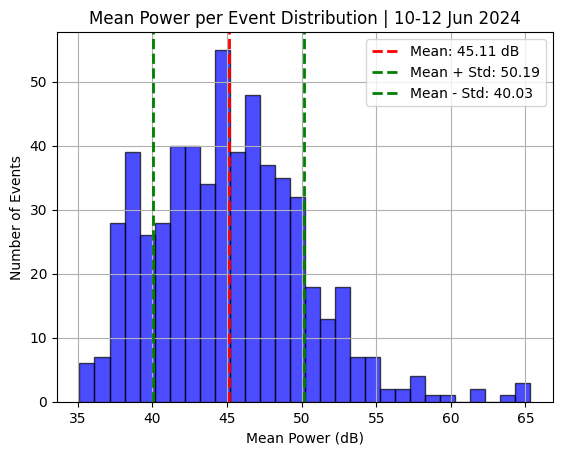

mean: 45.10835511009762
sd: 5.081426560168846


In [6]:
mean_power_event = np.mean(power_mean_dB)
std_power_event = np.std(power_mean_dB)

plt.hist(power_mean_dB, bins=30, alpha=0.7, color='b', edgecolor='black')
plt.axvline(mean_power_event, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_power_event:.2f} dB')
plt.axvline(mean_power_event + std_power_event, color='g', linestyle='dashed', linewidth=2, label=f'Mean + Std: {mean_power_event +std_power_event :.2f}')
plt.axvline(mean_power_event - std_power_event, color='g', linestyle='dashed', linewidth=2, label=f'Mean - Std: {mean_power_event -std_power_event :.2f}')

plt.title(f"Mean Power per Event Distribution | {date}")
plt.xlabel("Mean Power (dB)")
plt.ylabel("Number of Events")
plt.legend()
plt.grid(True)

fname=valid_filename( f"Mean Power per Event Distribution | {date}" )
fname=os.path.join(dir_plots,fname)
plt.savefig(fname, bbox_inches='tight')
plt.show()
print(f'mean: {mean_power_event}')
print(f'sd: {std_power_event}')

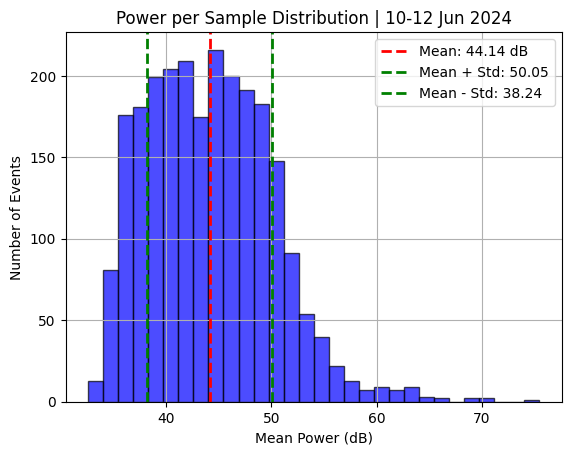

mean: 44.14455610145655 dB
sd: 5.908713251995352


In [7]:
mean_power_all=np.mean(power_all_dB)
std_power_all=np.std(power_all_dB)

plt.hist(power_all_dB, bins=30, alpha=0.7, color='b', edgecolor='black')
plt.axvline(mean_power_all, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_power_all:.2f} dB')
plt.axvline(mean_power_all + std_power_all, color='g', linestyle='dashed', linewidth=2, label=f'Mean + Std: {mean_power_all +std_power_all :.2f}')
plt.axvline(mean_power_all - std_power_all, color='g', linestyle='dashed', linewidth=2, label=f'Mean - Std: {mean_power_all -std_power_all :.2f}')

plt.title(f"Power per Sample Distribution | {date}")
plt.xlabel("Mean Power (dB)")
plt.ylabel("Number of Events")
plt.legend()
plt.grid(True)
fname=valid_filename(f"Power per Sample Distribution | {date}" )
fname=os.path.join(dir_plots,fname)
plt.savefig(fname, bbox_inches='tight')
plt.show()

print(f'mean: {mean_power_all} dB')
print(f'sd: {std_power_all}')

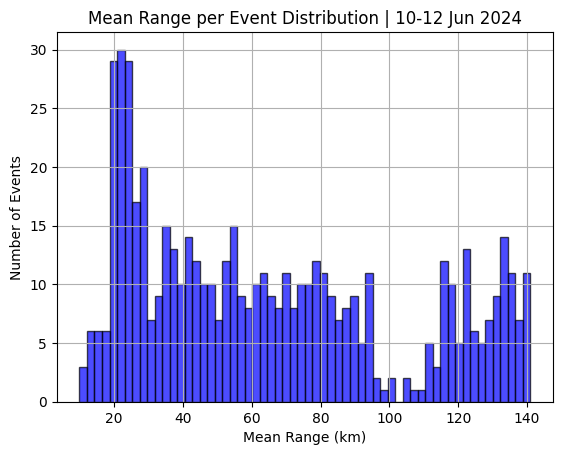

In [8]:
plt.hist(range_means,bins=60, alpha=0.7, color='b', edgecolor='black')
plt.title(f"Mean Range per Event Distribution | {date}")
plt.xlabel("Mean Range (km)")
plt.ylabel("Number of Events")
plt.grid(True)
fname=valid_filename(f"Mean Range per Event Distribution | {date}" )
fname=os.path.join(dir_plots,fname)
plt.savefig(fname, bbox_inches='tight')
plt.show()

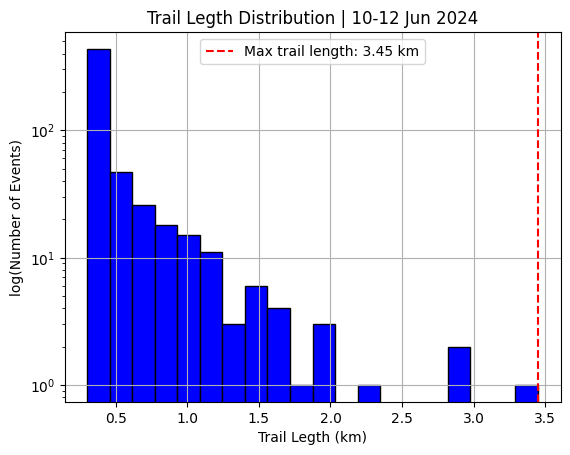

In [9]:
plt.hist(range_size,bins=20, color='b', edgecolor='black')
plt.axvline(np.max(range_size), color='red', linestyle='--', label=f'Max trail length: {np.max(range_size):.2f} km')
plt.legend()
plt.title(f"Trail Legth Distribution | {date}")
plt.xlabel("Trail Legth (km)")
plt.ylabel("log(Number of Events)")
plt.grid(True)
plt.yscale('log')
fname=valid_filename(f"Trail Legth Distribution | {date}" )
fname=os.path.join(dir_plots,fname)
plt.savefig(fname, bbox_inches='tight')
plt.show()


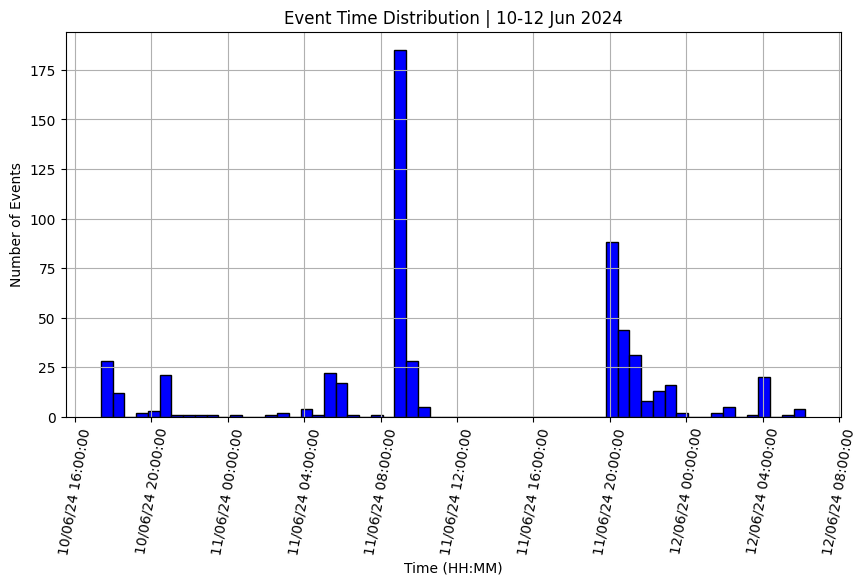

In [10]:
plt.figure(figsize=(10, 5))
plt.hist(np.array(timestamps, dtype="datetime64[s]"),bins=60, color='b', edgecolor='black')
ax = plt.gca()  # Obtener el eje actual
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d/%m/%y %H:%M:%S"))
plt.xticks(rotation=80) 
plt.title(f"Event Time Distribution | {date}")
plt.xlabel("Time (HH:MM)")
plt.ylabel("Number of Events")
plt.grid(True)
fname=valid_filename(f"Event Time Distribution | {date}" )
fname=os.path.join(dir_plots,fname)
plt.savefig(fname, bbox_inches='tight')
plt.show()

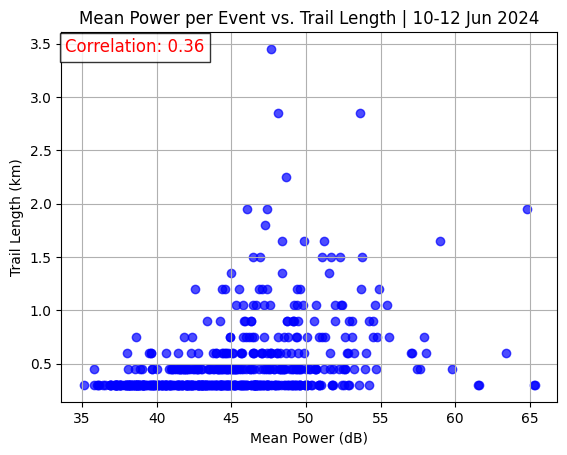

In [11]:
correlation = np.corrcoef(power_mean_dB, range_size)[0, 1]  # Calcula la correlación de Pearson

# Graficar el scatter plot
plt.scatter(power_mean_dB, range_size, color='b', alpha=0.7)
plt.title(f"Mean Power per Event vs. Trail Length | {date}")
plt.xlabel("Mean Power (dB)")
plt.ylabel("Trail Length (km)")
plt.grid(True)

plt.text(min(power_mean_dB)-1.23, max(range_size)-0.03, f"Correlation: {correlation:.2f}", 
         fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.8))
fname=valid_filename( f"Mean Power per Event vs. Trail Length | {date}")
fname=os.path.join(dir_plots,fname)
plt.savefig(fname, bbox_inches='tight')
plt.show()

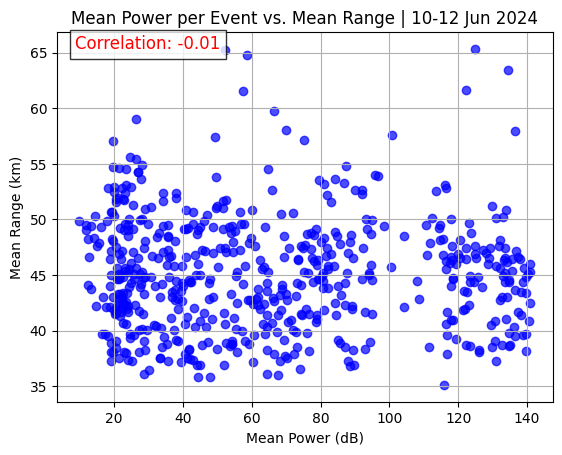

In [12]:
correlation = np.corrcoef(range_means,power_mean_dB)[0, 1]  # Calcula la correlación de Pearson

# Graficar el scatter plot
plt.scatter(range_means,power_mean_dB, color='b', alpha=0.7)
plt.title(f"Mean Power per Event vs. Mean Range | {date}")
plt.xlabel("Mean Power (dB)")
plt.ylabel("Mean Range (km)")
plt.grid(True)

plt.text(min(range_means)-1.23, max(power_mean_dB)-0.03, f"Correlation: {correlation:.2f}", 
         fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.8))
fname=valid_filename( f"Mean Power per Event vs. Mean Range | {date}")
fname=os.path.join(dir_plots,fname)
plt.savefig(fname, bbox_inches='tight')
plt.show()